# Task 1: Simple Linear Regression

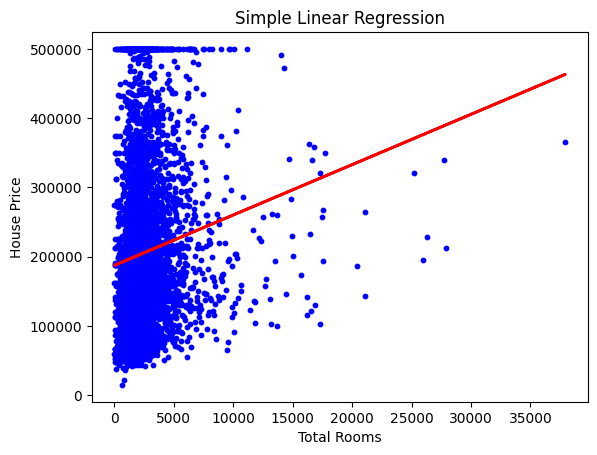

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

d = pd.read_csv("house_dataset.csv")
d = d.dropna()
x = d[["total_rooms"]]
y = d["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

m = LinearRegression()
m.fit(x_train, y_train)
yp = m.predict(x_test)

plt.scatter(x_test, y_test, color="blue", s=10)
plt.plot(x_test, yp, color="red", linewidth=2)
plt.xlabel("Total Rooms")
plt.ylabel("House Price")
plt.title("Simple Linear Regression")
plt.show()


# Task 2: Multiple Linear Regression

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

f = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
x = d[f]
y = d["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

m = LinearRegression()
m.fit(x_train, y_train)
yp = m.predict(x_test)

print("R-squared:", r2_score(y_test, yp))
print("MSE:", mean_squared_error(y_test, yp))
print("RMSE:", np.sqrt(mean_squared_error(y_test, yp)))
print("Coefficients:", m.coef_)


R-squared: 0.5710755317440979
MSE: 5865619646.959267
RMSE: 76587.3334629119
Coefficients: [ 1.88090465e+03 -1.98859259e+01  1.04980255e+02 -3.36259707e+01
  1.16315000e+02  4.76989661e+04]


# Task 3: Feature Scaling and Normalization

In [6]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

m1 = LinearRegression()
m1.fit(x_train, y_train)
yp1 = m1.predict(x_test)

s = StandardScaler()
x_train_s = s.fit_transform(x_train)
x_test_s = s.transform(x_test)

m2 = LinearRegression()
m2.fit(x_train_s, y_train)
yp2 = m2.predict(x_test_s)

print("R2 Before Scaling:", r2_score(y_test, yp1))
print("R2 After Scaling:", r2_score(y_test, yp2))


R2 Before Scaling: 0.5710755317440979
R2 After Scaling: 0.5710755317440979


# Task 4: Model Interpretation

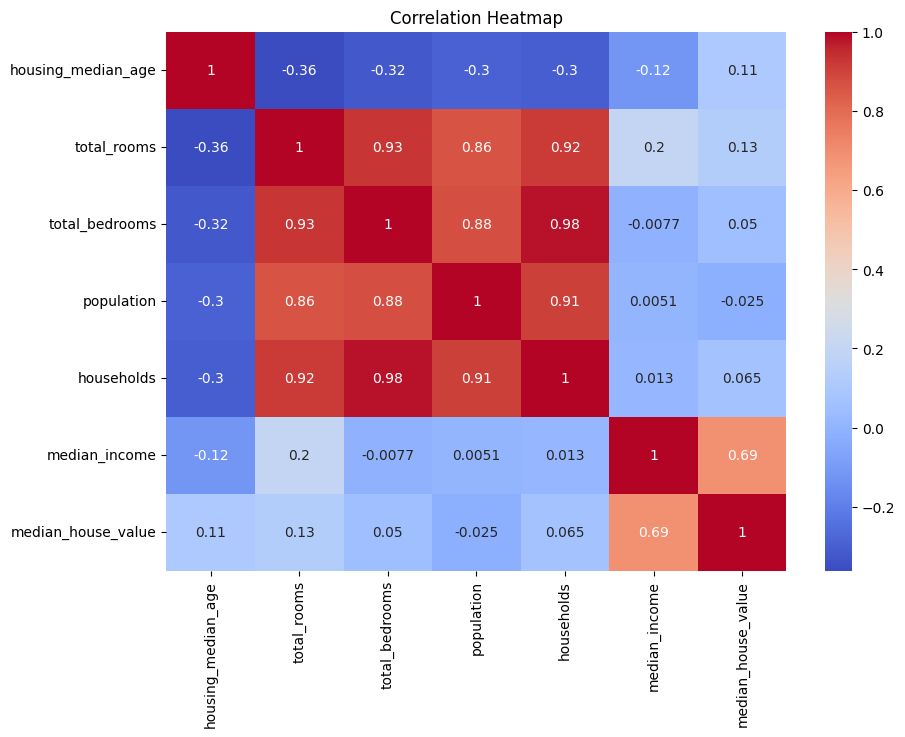

In [7]:
import seaborn as sns
f.append("median_house_value")
corr = d[f].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

``` Part II Logistic Regression```


# Task 5: Binary Classification with Logistic Regression

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score: 0.9977071732721913


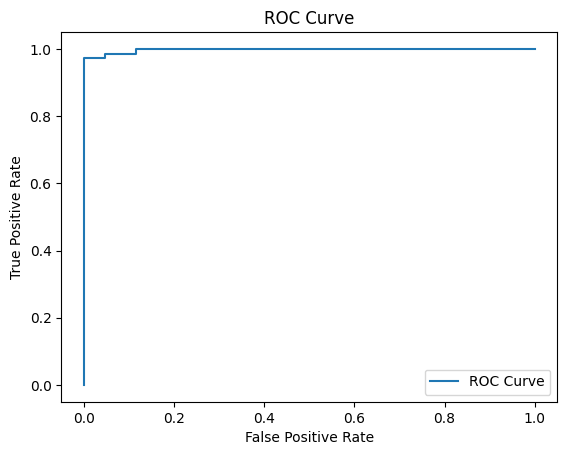

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

data = load_breast_cancer()
x = data.data
y = data.target

x1, x2, y1, y2 = train_test_split(x, y, test_size=0.2, random_state=42)
m = LogisticRegression(max_iter=10000)
m.fit(x1, y1)
yp = m.predict(x2)

print("Accuracy:", accuracy_score(y2, yp))
print("Confusion Matrix:\n", confusion_matrix(y2, yp))
print("Classification Report:\n", classification_report(y2, yp))
print("ROC AUC Score:", roc_auc_score(y2, m.predict_proba(x2)[:, 1]))

fpr, tpr, _ = roc_curve(y2, m.predict_proba(x2)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Task 6: Threshold Tuning and Probability Interpretation

Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104

Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104

Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791



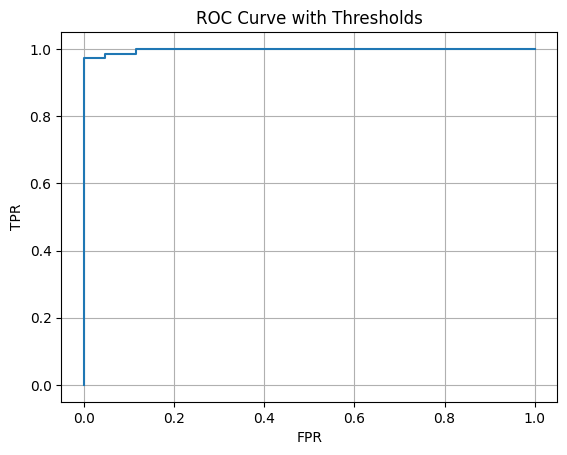

In [9]:
from sklearn.metrics import f1_score

probs = m.predict_proba(x2)[:, 1]
thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    yp_t = (probs >= t).astype(int)
    print(f"Threshold: {t}")
    print("Confusion Matrix:\n", confusion_matrix(y2, yp_t))
    print("F1 Score:", f1_score(y2, yp_t))
    print()

fpr, tpr, thresh = roc_curve(y2, probs)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve with Thresholds")
plt.grid()
plt.show()

# Task 7: Multiclass Classification (Optional)

In [12]:
from sklearn.datasets import load_iris
data = load_iris()
x = data.data
y = data.target

x1, x2, y1, y2 = train_test_split(x, y, test_size=0.2, random_state=42)
m = LogisticRegression(multi_class='ovr', max_iter=200)
m.fit(x1, y1)
yp = m.predict(x2)

print("Accuracy:", accuracy_score(y2, yp))
print("Classification Report:\n", classification_report(y2, yp))

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



d:\ML_Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# Part-III: General Questions




     "Ans1": "Linear regression assumes linearity, independence, homoscedasticity, and normality of errors.",
     "Ans2": "Logistic regression should be used when the output variable is categorical or binary.",
     "Ans3": "In logistic regression, coefficients represent the change in the log odds for a unit increase in the predictor.",
     "Ans4": "Sigmoid is for binary classification; softmax generalizes this for multiclass problems.",
     "Ans5": "R-squared measures variance explained, which is not meaningful for classification tasks like logistic regression."
